In [24]:
print("\n\t This ML programme, predicts the room-rates of hotels")



	 This ML programme, predicts the room-rates of hotels


In [25]:
train_data_path = "./data/processed_data.csv"
import pandas as pd
processed_data = pd.read_csv(train_data_path)
# processed_data


In [26]:
# drop rowws whose room-rates are zero
required_data = processed_data[processed_data['Room Rate'] > 0]

# Implement one-hot encoding for Hotel-Location
hotel_location = required_data['Hotel Location']
new_location_encoding = hotel_location.replace(to_replace=["Residence area", "Commercial area"], value=[1, 2])
required_data["Hotel Location"] = new_location_encoding

# Implement one-hot encoding for Room-type name
room_type_val = required_data['Room-type Name']
new_room_type_encoding = room_type_val.replace(to_replace=[
    "DELUXE", "DELUXE ROOM", "DELUX ROOM", "DELUXE SUITE", "CLASSIC KING", "CLASSIC ROOM", "CLASSIC SUITE", 
    "DIPLOMATIC", "DIPLOMATIC SUITE", 
    "SUITE", "SUPERIOR", "SUPERIOR STUDIO", "SUPERIOR ROOM", 
    "EXECUTIVE SUITE", "EXECUTIVE ROOM", 
    "SUPER CLASSIC", "DIPLOMATIC FLAT", 
    "1 BEDROOM APARTMENT", "STANDARD", "MINI FLAT", "CLASSIC STUDIO", 
    "2 BEDROOM APARTMENT", "MAINTENANCE BLOCK", "PRESIDENTIAL SUITE", 
    'DUPLEX(ROYAL SUITE)', 'PLATINUM STUDIO SUITE', 'GLUTTO TWIN APARTMENT', 
    'JUNIOR SUITE', 'APARTMENT', 'GLUTTO ROOM', 'GLUTTO SUITE'
    ], value=[1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
required_data["Room-type Name"] = new_room_type_encoding
required_data


C:\Users\HP\AppData\Local\Temp\ipykernel_7996\3423311706.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_location_encoding = hotel_location.replace(to_replace=["Residence area", "Commercial area"], value=[1, 2])
C:\Users\HP\AppData\Local\Temp\ipykernel_7996\3423311706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data["Hotel Location"] = new_location_encoding
C:\Users\HP\AppData\Local\Temp\ipykernel_7996\3423311706.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be 

,Room Rate,Month Record,Number of Star,Hotel Location,Number of Nights,Room-type Name
1,47500.0,10,3,1,2.0,5
2,95000.0,11,3,1,2.0,1
3,60000.0,11,3,1,1.0,5
4,100000.0,11,3,1,1.0,4
5,46875.0,11,3,1,1.0,5
...,...,...,...,...,...,...
5583,40000.0,1,4,2,2.0,1
5584,40000.0,1,4,2,2.0,1
5585,40000.0,1,4,2,1.0,7
5586,40000.0,1,4,2,1.0,1


In [27]:
# Select targets and features
target = required_data["Room Rate"]
# Select feature
features_list = ["Month Record", "Number of Star", "Hotel Location", "Number of Nights", "Room-type Name"]
features = required_data[features_list]

In [28]:
# split required_data into training & test set
# import scikit-lear
from sklearn.model_selection import train_test_split #
# the random_state argument ensures the same split is given always 
target_values = target.values
feature_values = features.values
train_X, val_X, train_y, val_y = train_test_split(feature_values, target_values, random_state=0)
# train_X
val_X[0]

array([5., 4., 2., 1., 1.])

In [29]:
# train model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)

# score
model_score = model.score(val_X, val_y)
print("\n\t model score: ", model_score)


	 model score:  0.2889149480048723


In [30]:
# Predictions
room_rate_predict = model.predict(val_X) # predict for all test data
print("\n\t chosen data prediction: ", room_rate_predict)

# Month Record,Number of Star,Hotel Location,Number of Nights,Room-type Name
print("\n\t val_X: ", val_X)

room_rate_predict = model.predict([val_X[2]]) # predict for chosen test data
print("\n\t room_rate_predict: ", room_rate_predict)





	 chosen data prediction:  [ 38381.27431291 113787.63369963  50248.39370656 ...  55740.
  37377.98811499  52662.28119713]

	 val_X:  [[ 5.  4.  2.  1.  1.]
 [10.  3.  1.  2.  9.]
 [ 7.  3.  1.  1.  5.]
 ...
 [ 4.  3.  1. 11. 12.]
 [ 7.  4.  2.  1.  1.]
 [ 6.  3.  1.  1.  5.]]

	 room_rate_predict:  [50248.39370656]


In [31]:
# predict for random values
# ["Residence area", "Commercial area"], value=[1, 2]
random_data = [11,3,1,1,5] # Month Record,Number of Star,Hotel Location,Number of Nights,Room-type Name
y_pred_random = model.predict([random_data]) # predict for all test data
y_pred_random
# val_X
# y_pred.shape

array([70046.11537982])

In [32]:
# models' accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import accuracy_score
mse = mean_squared_error([val_y[0]], room_rate_predict)
print("mean_squared_error:", mse)

mean_squared_error: 232513510.63017774


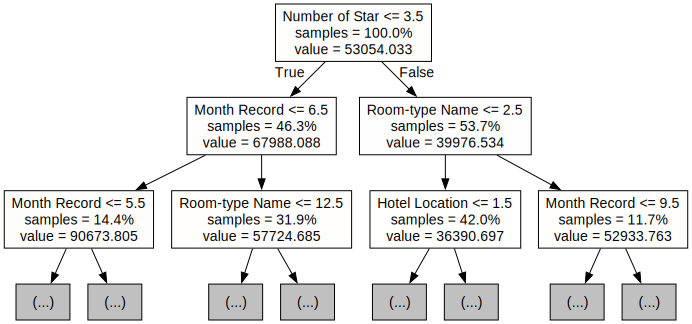

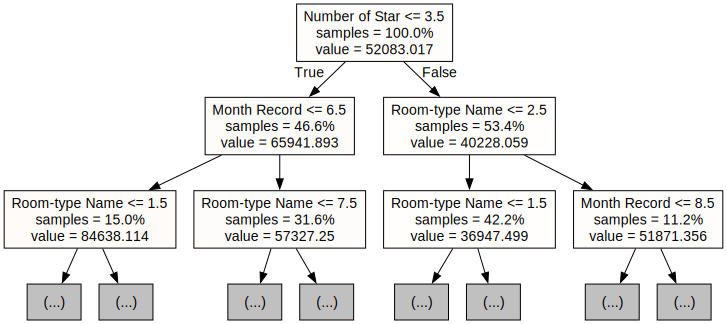

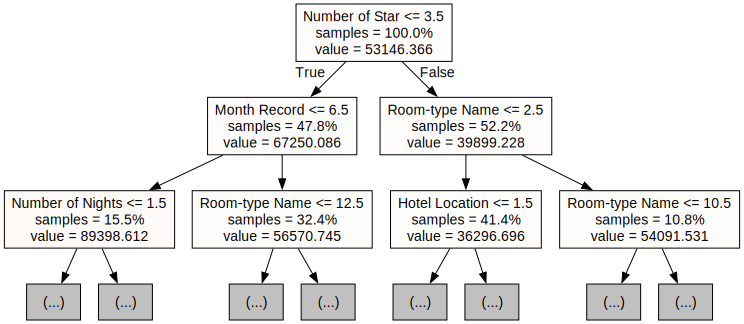

In [33]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
import graphviz 


for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=features_list,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)